In [1]:
from manifold_learning import IMD
from FastCCM import CCM
import numpy as np
from pydmd import DMD, BOPDMD
from manifold_learning.utils import utils
from sklearn.decomposition import PCA
from pydmd.preprocessing import zero_mean_preprocessing
from pydmd.plotter import plot_summary
from manifold_learning.data.data_loader import load_csv_dataset,get_truncated_lorenz_rand
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import imageio
import os
import tempfile
import importlib
importlib.reload(IMD)
importlib.reload(CCM)
importlib.reload(utils)

<module 'manifold_learning.utils.utils' from '/home/iaroslav/Documents/Python projects/manifold_learning/src/manifold_learning/utils/utils.py'>

In [2]:
X = load_csv_dataset("Jan1023_1_fr_ma2sec_sr30.csv").to_numpy()[:,1:]
X = StandardScaler().fit_transform(X)

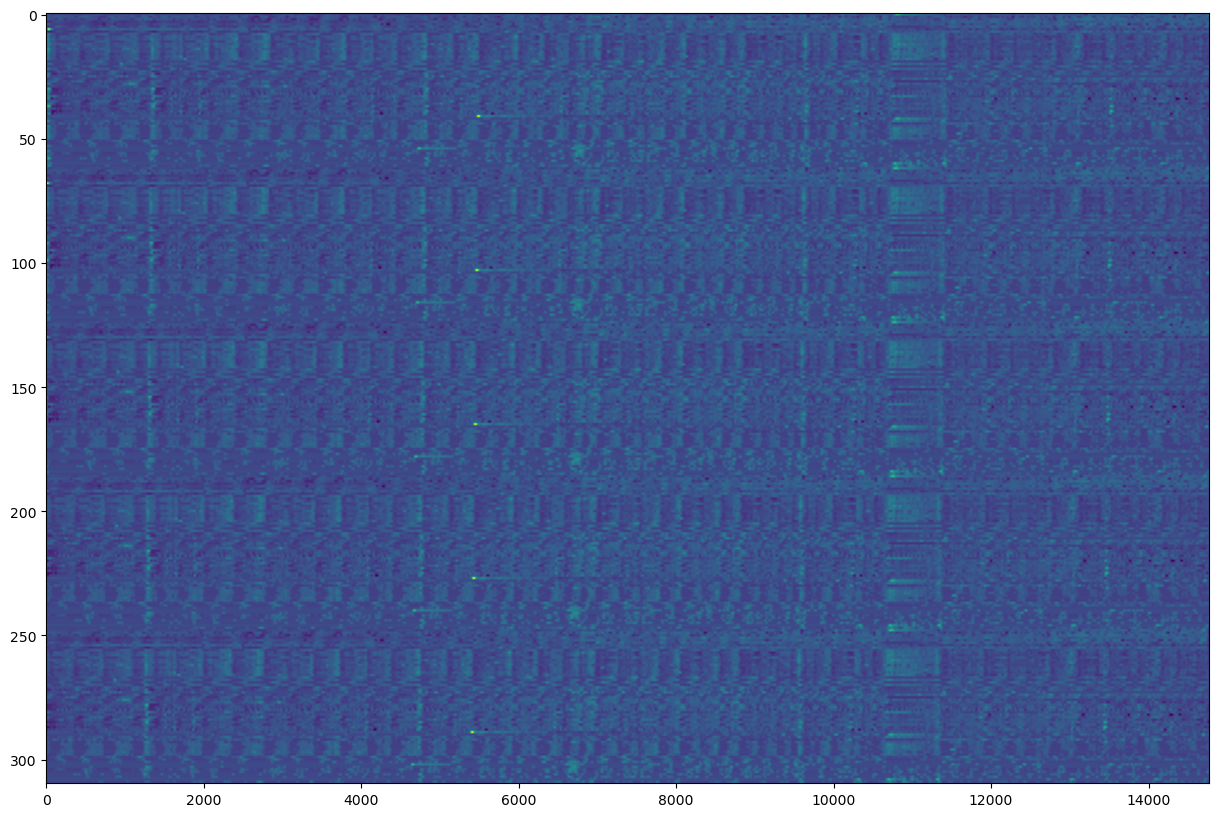

In [49]:
plt.figure(figsize=(15,10))
plt.imshow(X.T,aspect="auto")

In [4]:
X = utils.get_td_embedding_np(X,5,20).reshape(-1,5*X.shape[1])


In [129]:
trainer = IMD.IMD_nD(X.shape[1], embed_dim=15, n_components=5,subtract_corr=True, device="cuda")

In [130]:
trainer.fit(X, sample_len=600, library_len=2000, 
            exclusion_rad=30, nbrs_num=30, tp=90, 
            epochs=500, num_batches=1,optimizer="Adagrad", learning_rate=0.003,tp_policy="range")


Epoch 1/500, Loss: 1.4428
Epoch 2/500, Loss: 1.3384
Epoch 3/500, Loss: 1.2676
Epoch 4/500, Loss: 1.2284
Epoch 5/500, Loss: 1.1875
Epoch 6/500, Loss: 1.1541
Epoch 7/500, Loss: 1.1315
Epoch 8/500, Loss: 1.1058
Epoch 9/500, Loss: 1.0844
Epoch 10/500, Loss: 1.0655
Epoch 11/500, Loss: 1.0500
Epoch 12/500, Loss: 1.0385
Epoch 13/500, Loss: 1.0280
Epoch 14/500, Loss: 1.0187
Epoch 15/500, Loss: 1.0105
Epoch 16/500, Loss: 1.0029
Epoch 17/500, Loss: 0.9931
Epoch 18/500, Loss: 0.9891
Epoch 19/500, Loss: 0.9795
Epoch 20/500, Loss: 0.9744
Epoch 21/500, Loss: 0.9656
Epoch 22/500, Loss: 0.9598
Epoch 23/500, Loss: 0.9508
Epoch 24/500, Loss: 0.9448
Epoch 25/500, Loss: 0.9396
Epoch 26/500, Loss: 0.9321
Epoch 27/500, Loss: 0.9276
Epoch 28/500, Loss: 0.9232
Epoch 29/500, Loss: 0.9198
Epoch 30/500, Loss: 0.9155
Epoch 31/500, Loss: 0.9138
Epoch 32/500, Loss: 0.9109
Epoch 33/500, Loss: 0.9069
Epoch 34/500, Loss: 0.9054
Epoch 35/500, Loss: 0.9022
Epoch 36/500, Loss: 0.9001
Epoch 37/500, Loss: 0.8976
Epoch 38/5

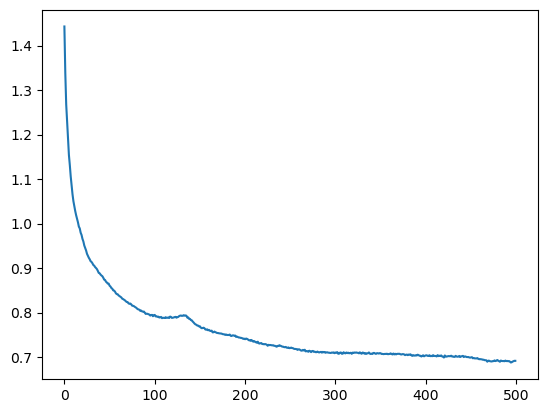

In [131]:
plt.plot(trainer.get_loss_history()[:])


In [132]:

unmixed = trainer.predict(X)

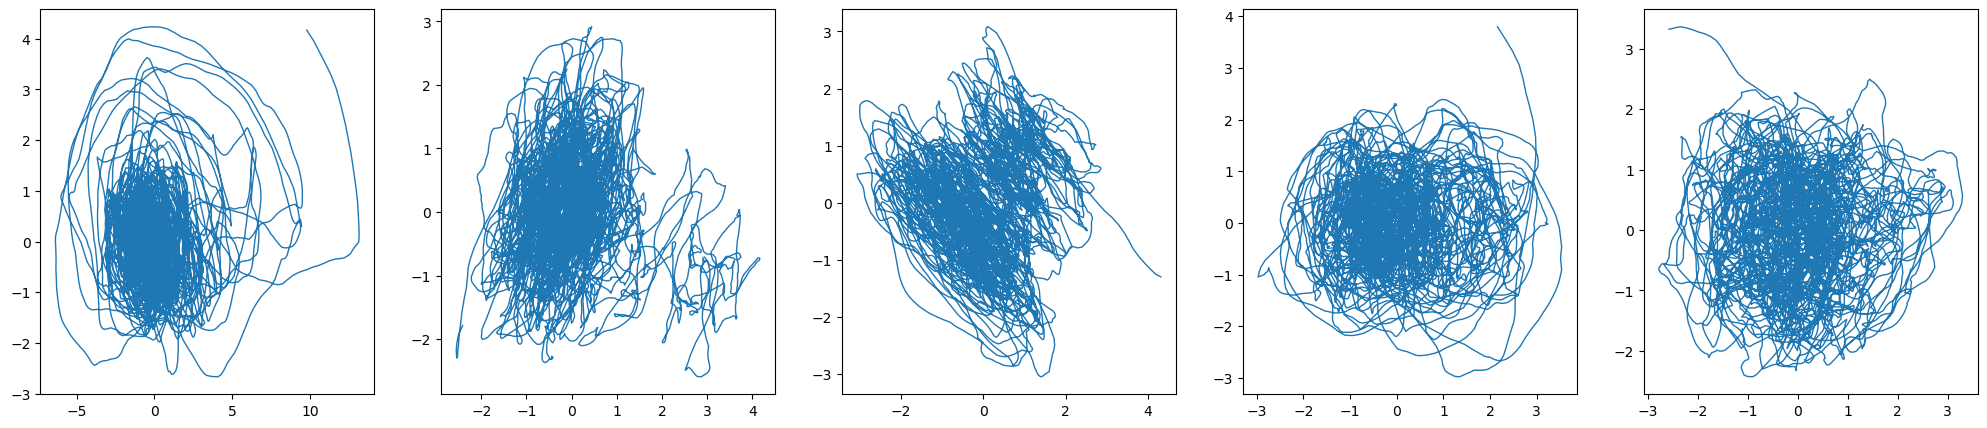

In [133]:
plt.figure(figsize=(5*unmixed.shape[1],5))
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    x_pca = PCA(2).fit_transform(unmixed[:,i,:])
    plt.plot(x_pca[:,0],x_pca[:,1],linewidth=1)

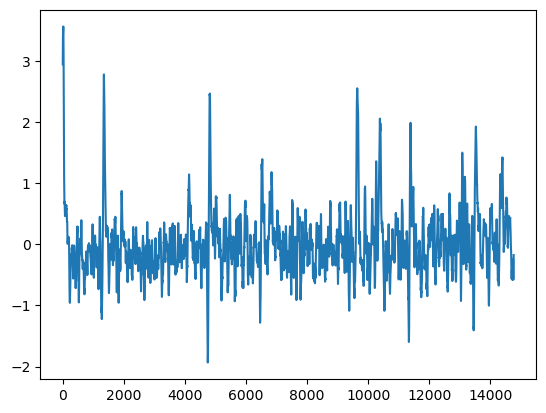

In [137]:
plt.plot(unmixed[:,0,1])

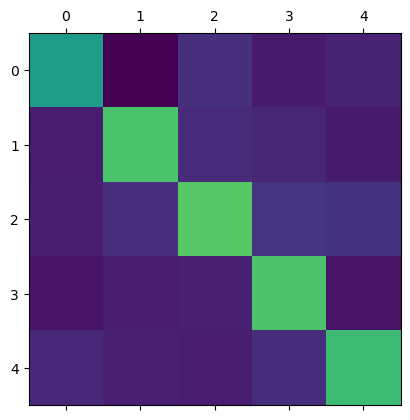

In [135]:
plt.matshow(CCM.PairwiseCCM().compute(np.transpose(unmixed,axes=(1,0,2)),np.transpose(unmixed,axes=(1,0,2)),1500,400,60,30,60).mean(axis=0),vmax=1)

In [136]:
import plotly.express as px
x_pca = PCA(3).fit_transform(unmixed[:,1,:])
fig = px.line_3d(x=x_pca[:,0], y=x_pca[:,1],z=x_pca[:,2],height=700)

fig.show()

In [118]:
[utils.calculate_rank_for_variance(unmixed[np.random.randint(0,unmixed.shape[0],5000),i],0.95) for i in range(unmixed.shape[1])]


[5, 5, 5, 3, 6]

In [119]:
[utils.calculate_correlation_dimension(unmixed[np.random.randint(0,unmixed.shape[0],1000),i],device="cuda") for i in range(unmixed.shape[1])]

[3.2952017784118652,
 2.6269819736480713,
 3.3278446197509766,
 3.1324431896209717,
 2.9215168952941895]